In [1]:
# !mkdir ../checkpoints
# !wget https://open-mmlab.s3.ap-northeast-2.amazonaws.com/mmsegmentation/models/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

In [2]:
from mmseg.apis import init_segmentor, inference_segmentor, show_result_pyplot
from mmseg.core.evaluation import get_palette
from mmcv import Config
from mmseg.models import build_segmentor
from mmcv.runner import load_checkpoint
from mmcv.parallel import MMDataParallel

In [3]:

#  # -- config file
# cfg = Config.fromfile(f'/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/configs/_base_/custom/custom_config.py')

# # -- test mode
# cfg.data.test.test_mode = True

# # -- gpu ids
# cfg.gpu_ids = [0]

# # -- train config not use
# cfg.model.train_cfg = None


# # -- checkpoint

# checkpoint_path = '/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/work_dirs/custom_config/latest.pth'
# # -- model
# model = build_segmentor(cfg.model, test_cfg = cfg.get('test_cfg')) # build detector
# load_checkpoint(model, checkpoint_path, map_location = 'cpu') # ckpt load
# model.CLASSES = ("Backgroud", "General trash", "Paper", "Paper pack", "Metal", "Glass", 
#            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")
# # model = MMDataParallel(model.cuda(), device_ids = [0])


In [4]:
# # build the model from a config file and a checkpoint file
config_file = Config.fromfile(f'/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/configs/_base_/custom/custom_config.py')
checkpoint_file = '/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/work_dirs/custom_config/latest.pth'

model = init_segmentor(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/work_dirs/custom_config/latest.pth


/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/mmseg/models/segmentors/base.py:268: UserWarning: show==False and out_file is not specified, only result image will be returned
  warnings.warn('show==False and out_file is not specified, only '


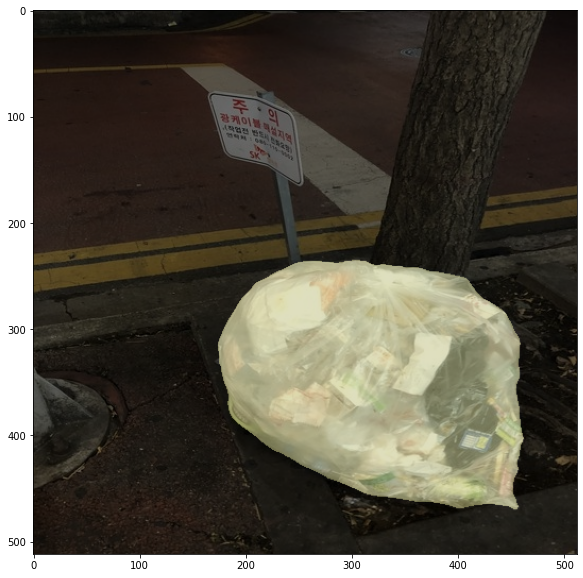

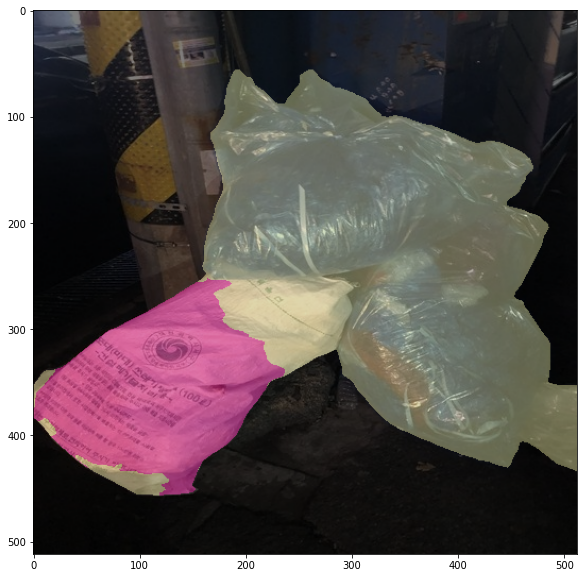

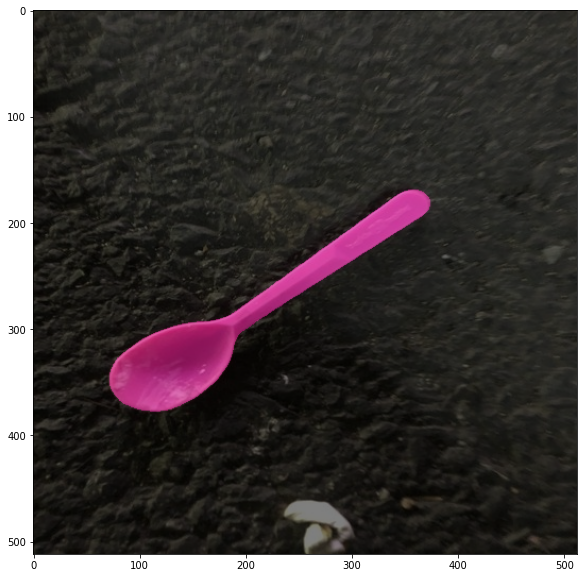

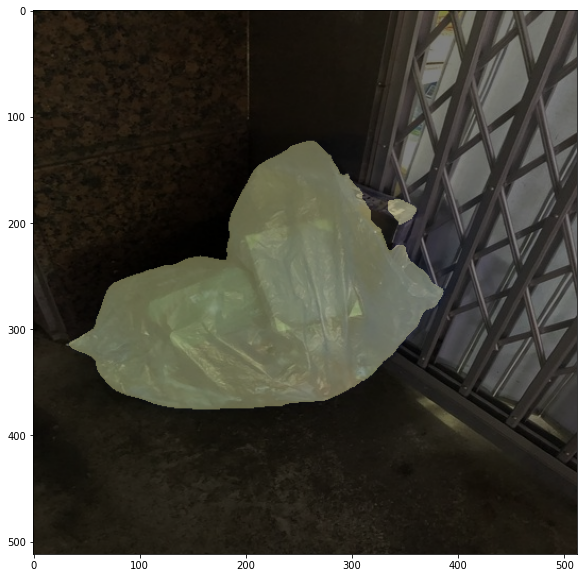

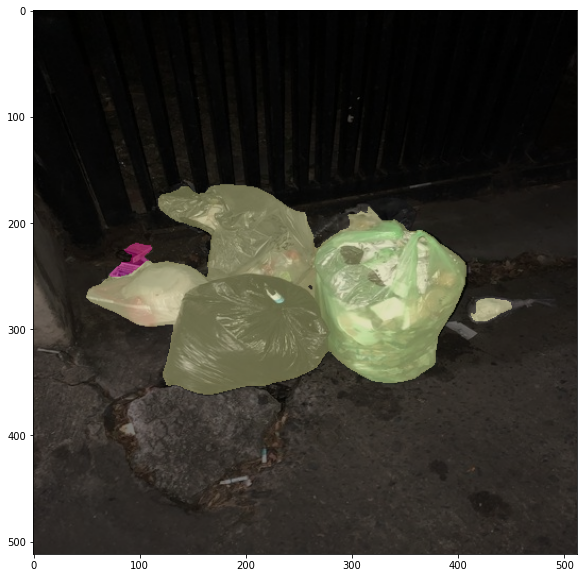

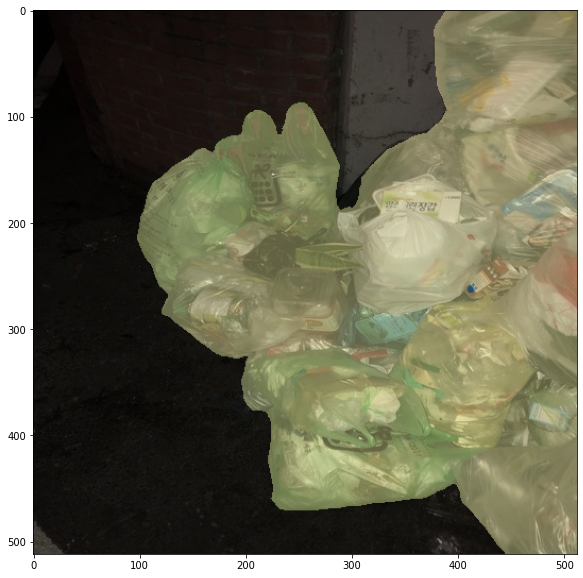

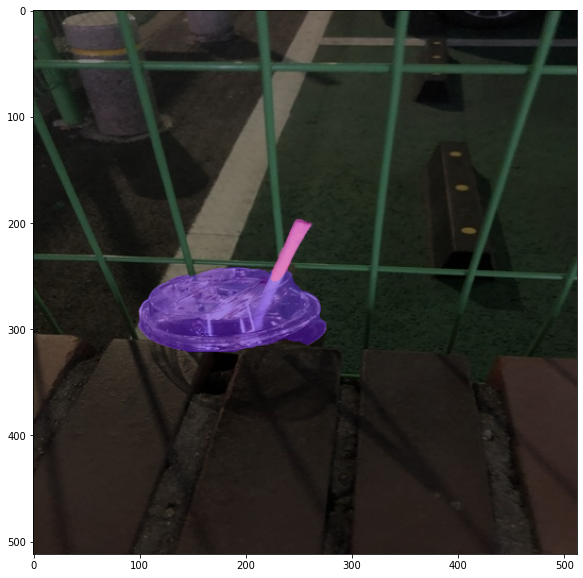

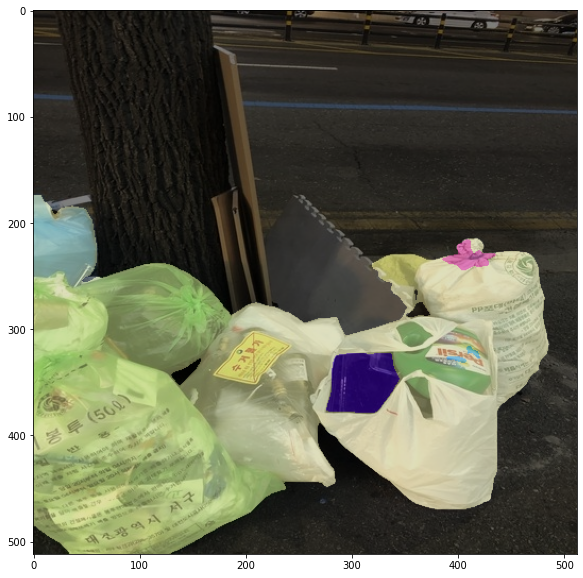

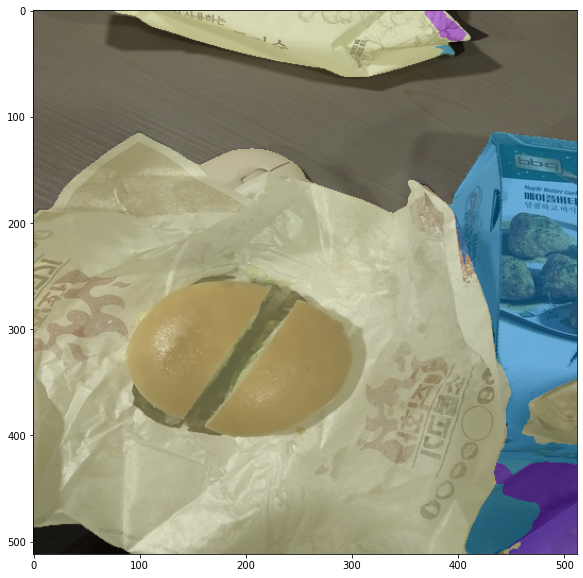

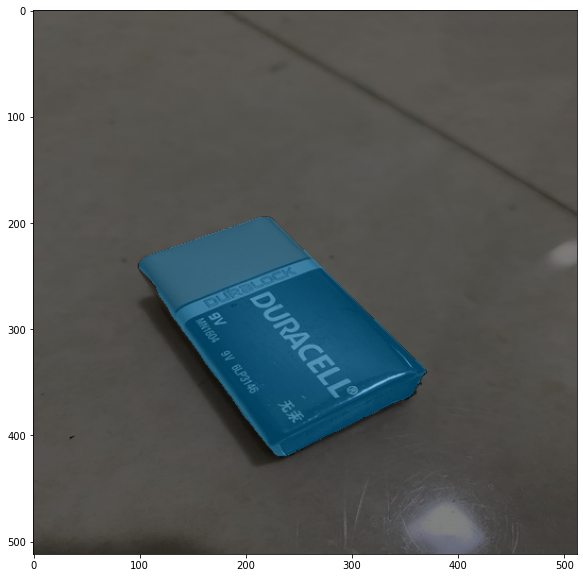

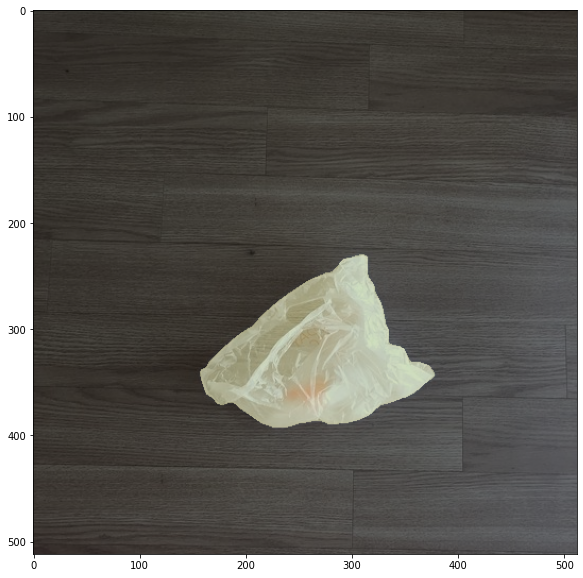

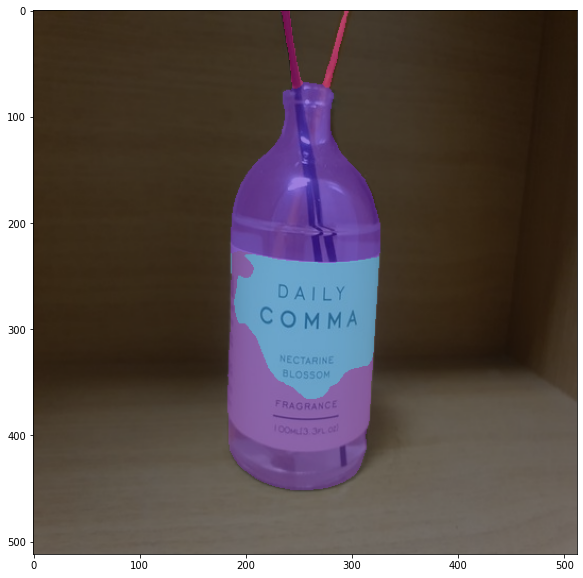

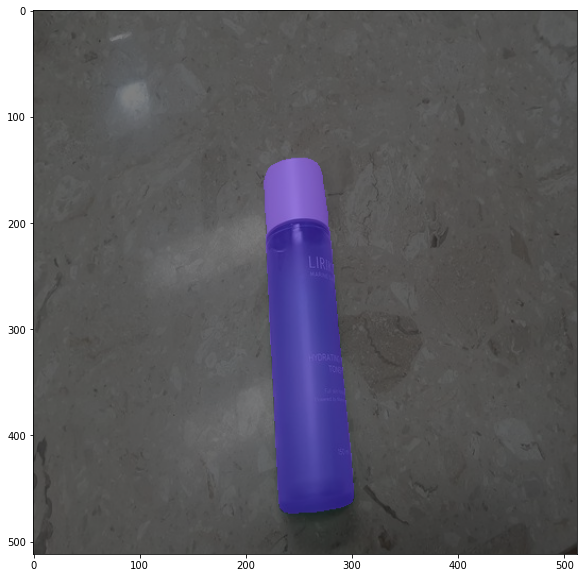

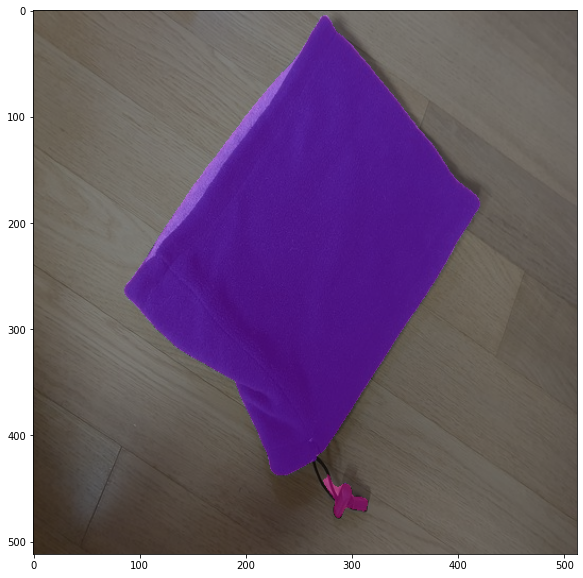

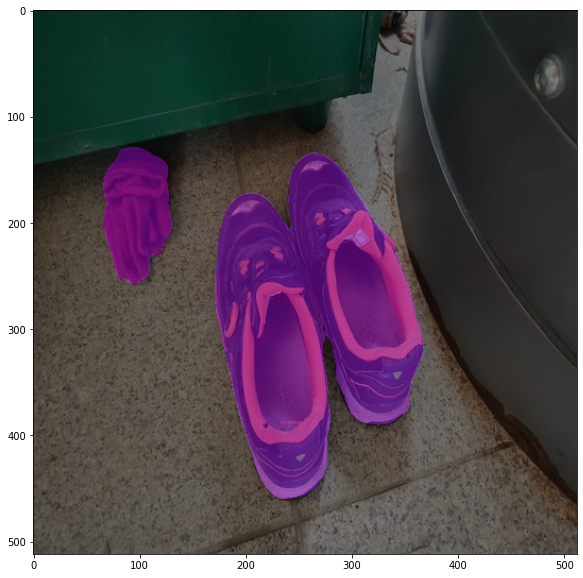

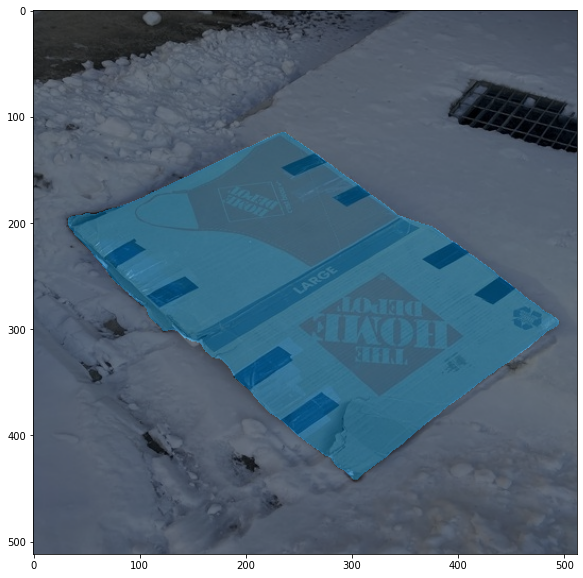

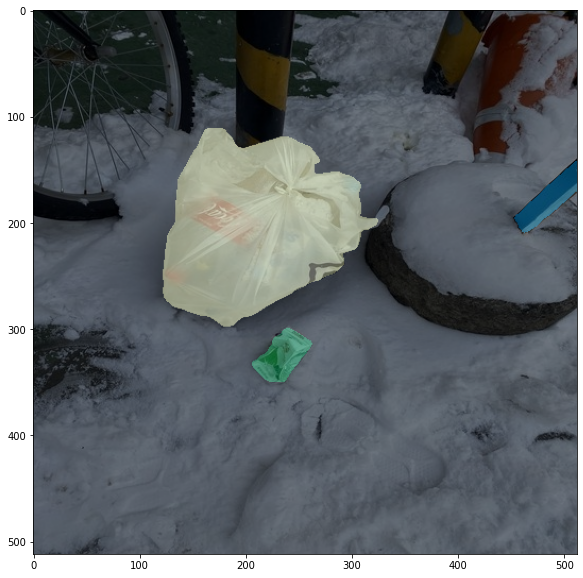

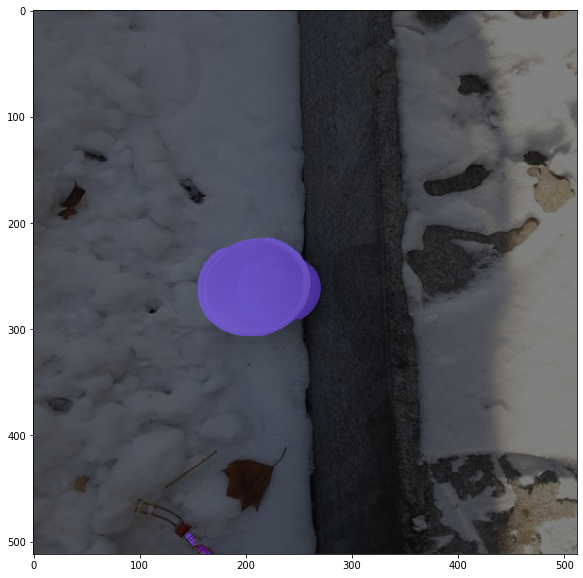

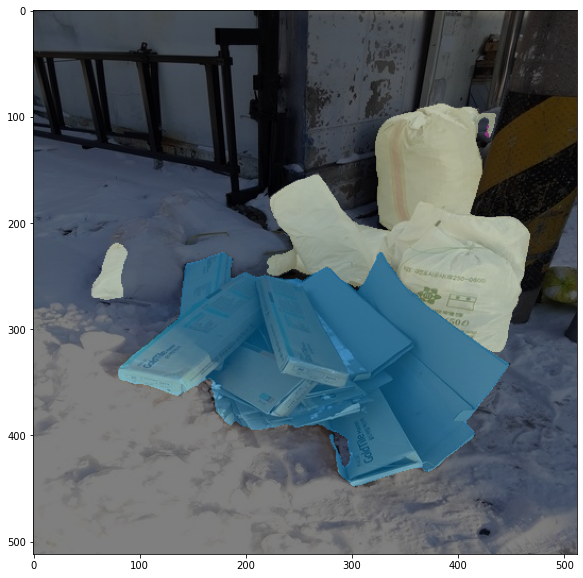

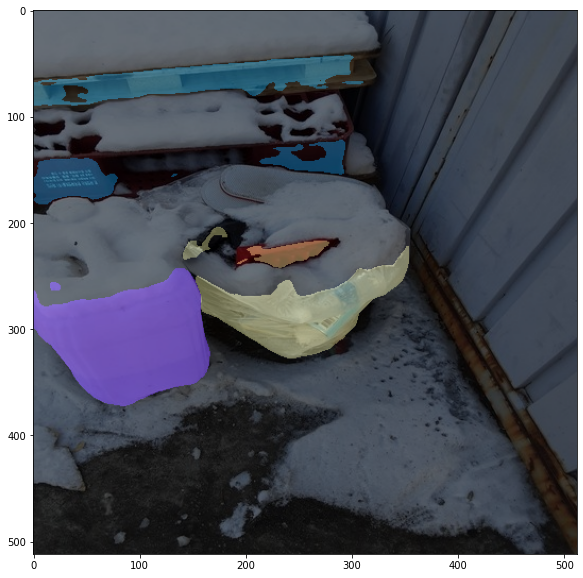

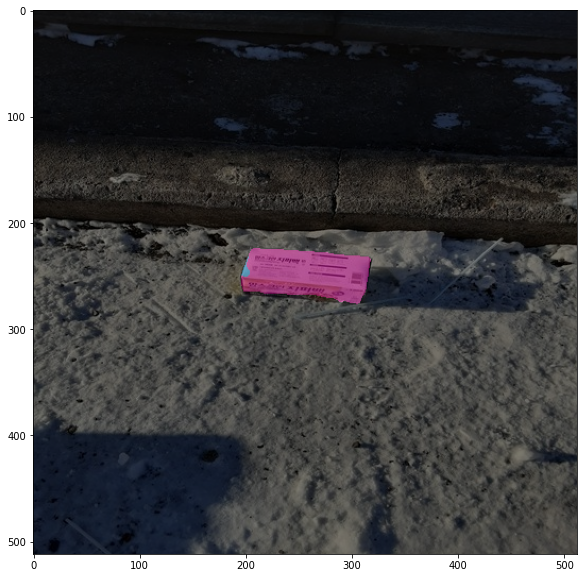

In [7]:
import os

prepath = '/opt/ml/level2-semantic-segmentation-level2-cv-04/Swin-Transformer-Semantic-Segmentation/test_img/'
for i in range(21):
	img=os.path.join(prepath,f'{i:04}.jpg')
	result = inference_segmentor(model, img)
	# show the results
	show_result_pyplot(model, img, result, model.PALETTE)